In [1]:
import sys
from pathlib import Path
import os 
ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

In [2]:
image_folder = ROOT / 'data/processed/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

In [4]:
from src.preprocess.image_preprocessor import ImagePreprocessor

raw_folder = ROOT / 'data/raw/'

decals_folder = raw_folder / 'galaxy10_decals'
eso_folder = raw_folder / 'eso_images'

processed_folder = ROOT / 'data/processed'

size = 256

img = 0
for folder in [decals_folder, eso_folder]:
    for reference in os.listdir(folder):
        img_str = str(img).zfill(4)
        reference_path = os.path.join(folder, reference)

        preprocessor = ImagePreprocessor(
            image_path=reference_path,
            width=size, 
            height=size
        )
        
        preprocessor.convert_to_fits(
            output_folder=processed_folder / f'img_{img_str}', 
            output_name=f'groundtruth'
        )
        img += 1

Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0000/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0001/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0002/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0003/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0004/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0005/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0006/groundtruth.fits
Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/img_0007/g

measures_update ... acquiring the lock ... 


lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
The lock file at /Users/luisvalenzuela/.casa/data is not empty.
A previous attempt to update path may have failed or exited prematurely.
Remove the lock file and set force to True with the desired version (default to most recent).
It may be best to completely repopulate path using pull_data and measures_update.
2025-06-27 02:00:10	SEVERE	::casa	lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
2025-06-27 02:00:10	SEVERE	::casa	The lock file at /Users/luisvalenzuela/.casa/data is not empty.
2025-06-27 02:00:10	SEVERE	::casa	A previous attempt to update path may have failed or exited prematurely.
2025-06-27 02:00:10	SEVERE	::casa	Remove the lock file and set force to True with the desired version (default to most recent).
2025-06-27 02:00:10	SEVERE	::casa	It may be best to completely repopulate path using pull_data and measures_update.
2025-06-27 02:00:10	SEVERE	::casa	
2025-06-27 02:00:10

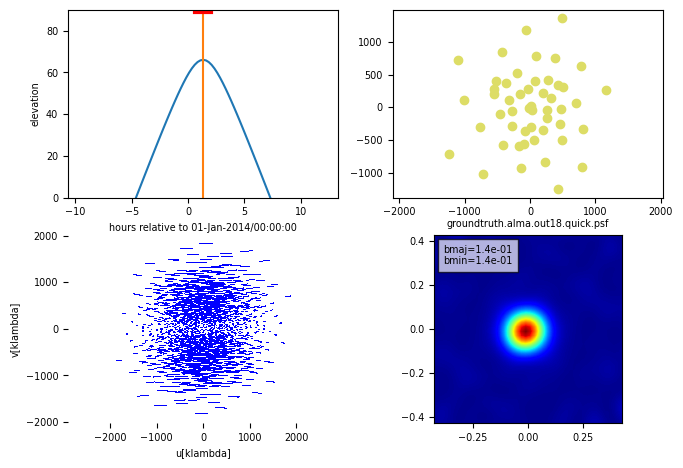

In [3]:
from src.preprocess.simulator import Simulator
import json

simobserve_configs = [
    {
        'antenna' : 'alma.out28.cfg',
        'totaltime' : 50000, # in seconds
        'noise': 10, # in Jy
        'arcsec': 0.02, # in arcseconds
    },
    {
        'antenna' : 'alma.out18.cfg',
        'totaltime' : 5000, # in seconds
        'noise': 20,  # in Jy
        'arcsec': 0.02,  # in arcseconds
    }
]

images_folder_path = ROOT / 'data/processed/'
images_folder = os.listdir(images_folder_path)

for image in images_folder:
    if not image.startswith('img_'):
        continue
    
    image_path = images_folder_path / image / 'groundtruth.fits'
    
    for sim_number, simobserve_config in enumerate(simobserve_configs, start=1):
        simulator = Simulator(
            image=image_path, 
            simobserve_config=simobserve_config,
            output_folder= images_folder_path / image / f'sim{sim_number}',
            output_name='visibilities'
        )
        simulator.simulate()

        # Save the simobserve configuration to a JSON file
        config_path = images_folder_path / image / f'sim{sim_number}' / 'simobserve_config.json'
        with open(config_path, 'w') as f:
            json.dump(simobserve_config, f, indent=4)